## Stock Market Daily Changes 

__As discussed in class, the percentage daily change of the stock market index, tracked over a long period of time, can be modeled as a random process with normal distribution. In this exercise, you will download real market data of a particular stock (or an index, such as Dow Jones or S&P500) and find out if that is the case.__

__To access Nasdaq's historical data, please visit their website (https://www.nasdaq.com/market-activity/quotes/historical) and select one of the 10 most popular stocks listed on the page or enter the ticker symbol of your favorite stock. Once you have selected your stock, click on the provided link, then choose the "MAX" option, which typically provides data spanning over a 10-year period. Finally, download the CSV file to access the data.__

__Which stock did you pick? Please make sure to include the CSV file when submitting the homework.__

__NOTE: You cannot pick AAPL.__

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt 

## Step 1: Read the stock historical data 

In [3]:
df = pd.read_csv('HistoricalData_AAPL_10years.csv')

<h2>Step 2: df.info( ): details of the DataFrame - shape, row index, column labels, dtypes</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


### Display the dataframe index and column labels

In [5]:
df.index

RangeIndex(start=0, stop=2518, step=1)

In [6]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [7]:
df.shape

(2518, 6)

### There are a total of 2518 trading days in this historical data.

## Step 3: Display the first 5 rows of the dataframe

In [8]:
## Display the first 5 rows of data

df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/22/2024,$172.28,71160140,$171.76,$173.05,$170.06
1,03/21/2024,$171.37,106181300,$177.05,$177.49,$170.84
2,03/20/2024,$178.67,53423100,$175.72,$178.67,$175.09
3,03/19/2024,$176.08,55215240,$174.34,$176.605,$173.03
4,03/18/2024,$173.72,75604180,$175.57,$177.71,$173.52


## Step 4: Data cleaning before data analysis

<h3>Step 4.1: Remove the dollar signs in the price columns and convert them to float</h3>

In [9]:
df['Open'].str.strip("$")

0        171.76
1        177.05
2        175.72
3        174.34
4        175.57
         ...   
2513    19.2257
2514    19.2863
2515    19.5186
2516    19.3393
2517    19.2293
Name: Open, Length: 2518, dtype: object

In [10]:
col = ['Close/Last', 'Open', 'High', 'Low']

for c in col:
    df[c] = df[c].str.strip('$')

In [11]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/22/2024,172.28,71160140,171.76,173.05,170.06
1,03/21/2024,171.37,106181300,177.05,177.49,170.84
2,03/20/2024,178.67,53423100,175.72,178.67,175.09
3,03/19/2024,176.08,55215240,174.34,176.605,173.03
4,03/18/2024,173.72,75604180,175.57,177.71,173.52


### We need to convert the string to float using either astype() or pd.to_numeric

In [12]:
df[col] = df[col].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2518 non-null   object 
 1   Close/Last  2518 non-null   float64
 2   Volume      2518 non-null   int64  
 3   Open        2518 non-null   float64
 4   High        2518 non-null   float64
 5   Low         2518 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.2+ KB


### Step 4.2: The Date column needs to be converted to datetime format first

In [13]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
 2   Volume      2518 non-null   int64         
 3   Open        2518 non-null   float64       
 4   High        2518 non-null   float64       
 5   Low         2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


## Step 5: Examine the column data statistics using df.describe()

In [14]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,81.576623,1.304073e+08,81.512308,82.388298,80.683663
std,57.609022,7.658538e+07,57.559038,58.186513,56.966585
min,18.498600,2.404834e+07,18.501800,18.610400,18.261800
25%,31.336550,7.894942e+07,31.394375,31.604375,31.095350
50%,50.753750,1.092608e+08,50.772500,51.151250,50.365000
75%,141.110000,1.604801e+08,141.021250,143.032500,138.362500
max,198.110000,7.583531e+08,198.020000,199.620000,197.000000


### Note that df.describe() returns a DataFrame

In [15]:
df1 = df.describe()
type(df1)

pandas.core.frame.DataFrame

### Find the largest trading volumn

In [16]:
df1.loc['max', 'Volume']

758353097.0

### Find the all-time high in closing price

In [17]:
df1.loc['max', 'Close/Last']

198.11

### Which date(s) did the all-time high in closing price occur? 

## Step 6: Plot the historical performance chart 

### 10-Year Historical Price Plot

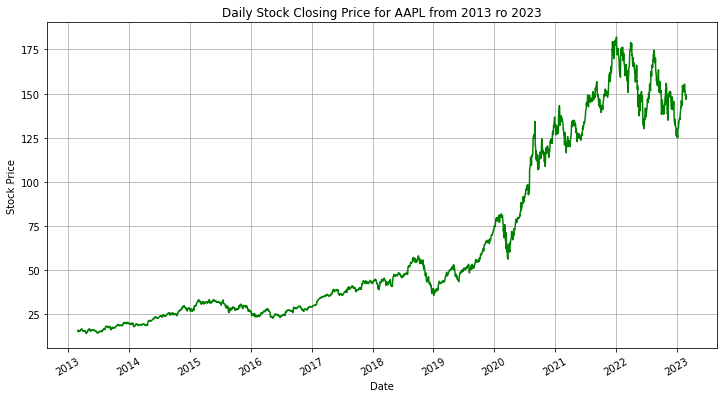

In [18]:
plt.figure(figsize=(12,6))

plt.plot(df.Date, df['Close/Last'], 'g', label='Stock Price')

plt.xticks(rotation=30)     # rotate the xtick labels by 30% for better viewing
plt.ylabel('Stock Price')
plt.xlabel('Date')

plt.title('Daily Stock Closing Price for AAPL from 2013 ro 2023')  
plt.grid()

plt.show()

## Step 7: Data Analysis: the statistical distribution of the daily price change

### Add 2 new columns for daily price change & daily price change %

In [19]:
df['Price Change'] = df['Close/Last'] - df['Open']
df['Change %'] = df['Price Change']/df['Open']*100

df.head()

,Date,Close/Last,Volume,Open,High,Low,Price Change,Change %
0,2023-02-27,147.92,44998470,147.71,149.17,147.4500,0.21,0.142170
1,2023-02-24,146.71,55469610,147.11,147.19,145.7202,-0.40,-0.271905
2,2023-02-23,149.40,48394250,150.09,150.34,147.2400,-0.69,-0.459724
3,2023-02-22,148.91,51011310,148.87,149.95,147.1600,0.04,0.026869
4,2023-02-21,148.48,58867230,150.20,151.30,148.4050,-1.72,-1.145140


### Find out the mean and standard deviation of "Change %"

In [20]:
df_mean = df["Change %"].mean()
df_std = df["Change %"].std()

print (df_mean, df_std)

0.06203603396679799 1.3963734735632647


### It's interesting to note that the mean daily % change is a positive number. 
### Though it seems small, however, over 10 years, the compounding effect resulted in big multiple of gains.

### Plot a histogram to observe the "Change %" distribution

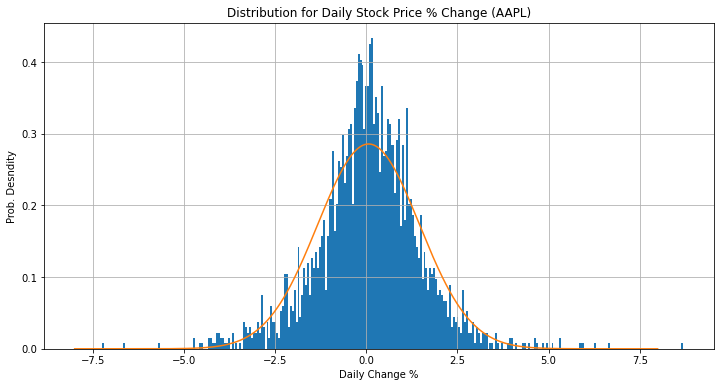

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df["Change %"], 300, density=True)
plt.title('Distribution for Daily Stock Price % Change (AAPL)')

# Give y axis label for the plot
plt.ylabel('Prob. Desndity')
plt.xlabel('Daily Change %')
plt.grid(True, which='both')

## Overlapping with N(mean, std)

from scipy.stats import norm

# Plot between -8 and 8 with .001 steps.
x_axis = np.arange(-8, 8, 0.01)

# plot a normal distribution with mean = df_mean, std = df_std)
plt.plot(x_axis, norm.pdf(x_axis, df_mean, df_std))

plt.show()

### The daily stock price change does behaves like a normally distributed random process. 